In [1]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv
import matplotlib
load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']
os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import pandas as pd
from src.dst.outputhandler.pickle import tic,toc,pickle_save_,pickle_load
from src.dst.plots.plots import plotting_tool,retrieve_data,SeabornFig2Grid
from src.visualization.vis_LSTM_p.main import main_visualize

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from src.visualization.vis_LSTM_p.main import main_visualize


# DEEP2

In [4]:
path                                  =  './models/CMA_ES/DEEP2/'
path_a                                = [path]
RD                                    = retrieve_data()
df,dict_,path_best                    = RD.get_max_CMA(path)


BO_vis                                = plotting_tool(dict_['dict_config'])

df                                     = df[df['epoch'] < 150]
array_AUC_tr_a                         = RD.get_all_cma(path_a,'AUC_tr')
array_AUC_v_a                          = RD.get_all_cma(path_a,'AUC_v')
array_AUC_t_a                          = RD.get_all_cma(path_a,'AUC_t')

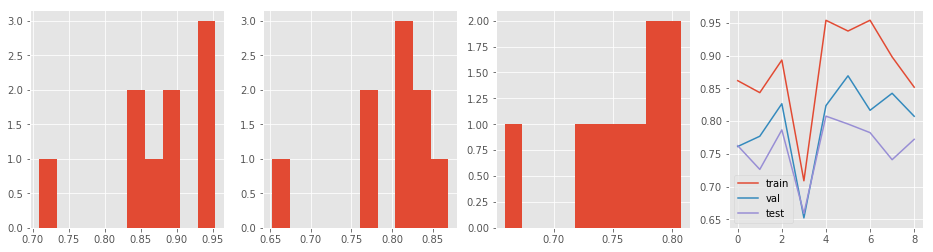

In [5]:
fig = plt.figure(figsize=(16,4))

ax1 = plt.subplot(141)
ax1 = plt.hist(array_AUC_tr_a)

ax2 = plt.subplot(142)
ax2 = plt.hist(array_AUC_v_a)

ax3 = plt.subplot(143)
ax3 = plt.hist(array_AUC_t_a)


ax4 = plt.subplot(144)
ax4 = plt.plot(array_AUC_tr_a,label = 'train')
ax4 = plt.plot(array_AUC_v_a,label = 'val')
ax4 = plt.plot(array_AUC_t_a,label = 'test')
plt.legend()
plt.show()


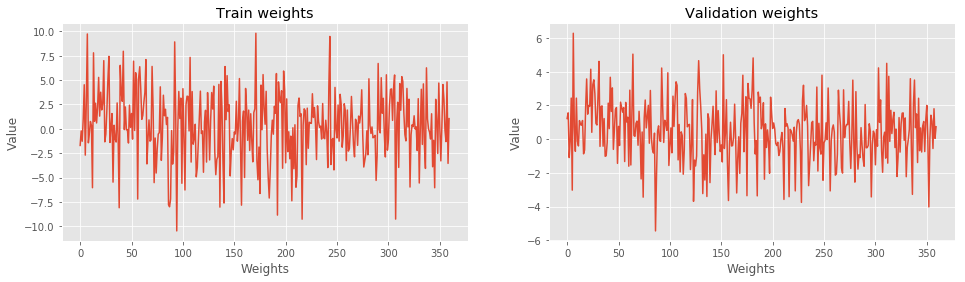

In [6]:
BO_vis.plot_weigths(dict_['x_tr'],dict_['x_v'])

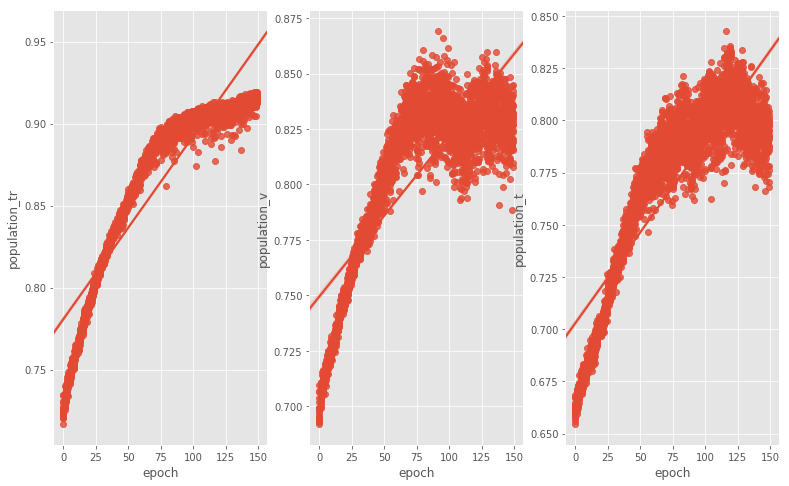

In [7]:
fig = plt.figure(figsize=(13,8))
ax1 = plt.subplot(131)
ax1 = sns.regplot(x='epoch',y='population_tr',data =df)

ax2 = plt.subplot(132)
ax2 = sns.regplot(x='epoch',y='population_v',data =df)
ax3 = plt.subplot(133)

ax3 = sns.regplot(x='epoch',y='population_t',data =df)

plt.show()


In [8]:
len(df[df['epoch']== 4])

21

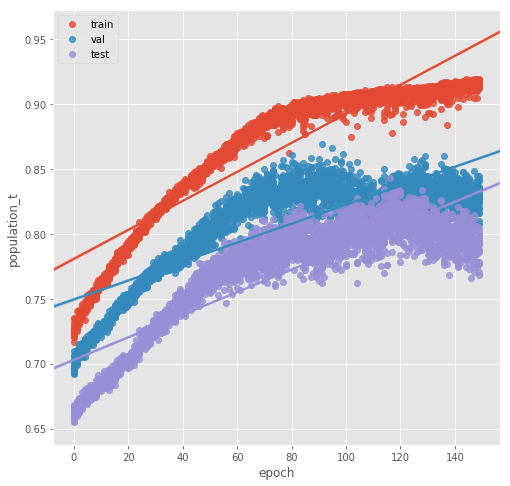

In [9]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))



ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()
plt.savefig('./plots/pic/CMA_training')

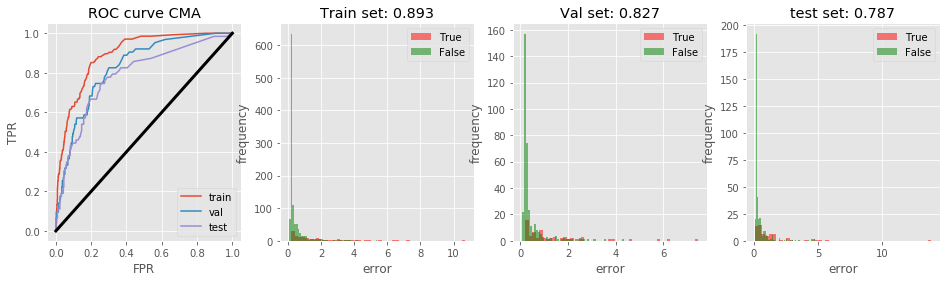

In [8]:
BO_vis.plot_cma(dict_)

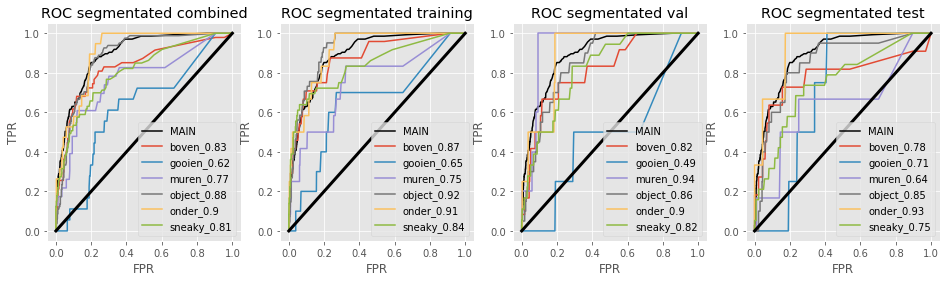

In [9]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'segmentation',cma = True)

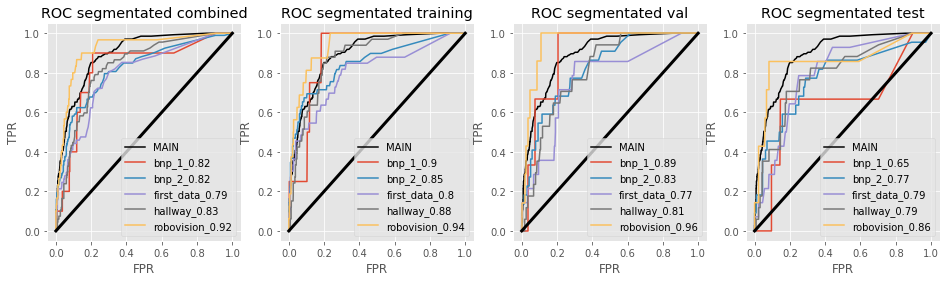

In [10]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'location',cma = True)

In [13]:
dict_c = {
        'path'       :  path_best+'/',
        'mode'       : 'df_t_train',

        'path_dict'  : path_best+'/dict.p',

        'plot_mode'  : 'error'


}
vis = main_visualize(dict_c)
vis.play_videos()


In [12]:
path_best+'/dict.p'

'./models/CMA_ES/DEEP2/29/dict.p'